# COMP40370 Pratical 1 (Part A)

***


### Imports

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


***

## Question 1: Data Exploration

***

Reading and analyzing a dataframe of medical patient records. Columns 1-8 consist of medical variables and the final column contains the target variable, **Outcome** 

### 1: Descriptive Statistics

In [96]:
#Read diabetes.csv
df = pd.read_csv('diabetes.csv')
#Print First 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1


In [97]:
#Print the number of rows and columns
print("Number of Rows: %d." % (df.shape[0]))
print("Number of Columns: %d" % (df.shape[1]))

Number of Rows: 788.
Number of Columns: 9


In [98]:
#Calculate the min, max, mean, and std of the 'age' column using pandas
min_age = df['Age'].min()
print("The minimum age is: %d" % (min_age))
max_age = df['Age'].max()
print("The maximum age is: %d" % (max_age))
mean_age = df['Age'].mean()
print("The mean age is: %d" % (mean_age))
std_age = df['Age'].std()
print("The standard deviation is: %d" % (std_age))

The minimum age is: 12
The maximum age is: 81
The mean age is: 33
The standard deviation is: 11


In [99]:
#What is the mode of the ‘age’ column? Comment on the data’s modality (i.e., bimodal, trimodal, etc.).
mode_age = df['Age'].mode()
print("The mode of the age column is: %d" % (mode_age))

# The age column has a unimodal mode given that 15 is the only integer that repeats itself

The mode of the age column is: 22


/tmp/ipykernel_9637/3344285596.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("The mode of the age column is: %d" % (mode_age))


In [100]:
#Use pandas to calculate the first quartile (Q1) and the third quartile (Q3) of the 'Age' column
Q1_age = df['Age'].quantile(0.25)
print("The First Quartile of the Age Column is : %d" % (Q1_age))
Q3_age = df['Age'].quantile(0.75)
print("The Third Quartile of the Age Column is : %d" % (Q3_age))

The First Quartile of the Age Column is : 24
The Third Quartile of the Age Column is : 41


In [101]:
#What is the interquartile range of the 'Age' column?
interquartile_age = Q3_age - Q1_age
interquartile_age

17.0

In [102]:
#Print the five-number summary of the 'Age' column

# Five Number summary consists of: Min, Q1, Q2 (Median), Q3, Max
Q2_age = df['Age'].quantile(0.50)
Q2_age
print("Five Number Summary:")
print("\t#1: The min value for the Age Column is %d." % (min_age))
print("\t#2: The Q1 value for the Age Column is %d." % (Q1_age))
print("\t#3: The Q2(Median) value for the Age Column is %d." % (Q2_age))
print("\t#4: The Q3 value for the Age Column is %d." % (Q3_age))
print("\t#5: The max value for the Age Column is %d." % (max_age))

Five Number Summary:
	#1: The min value for the Age Column is 12.
	#2: The Q1 value for the Age Column is 24.
	#3: The Q2(Median) value for the Age Column is 29.
	#4: The Q3 value for the Age Column is 41.
	#5: The max value for the Age Column is 81.


### 2: Data Visualisation

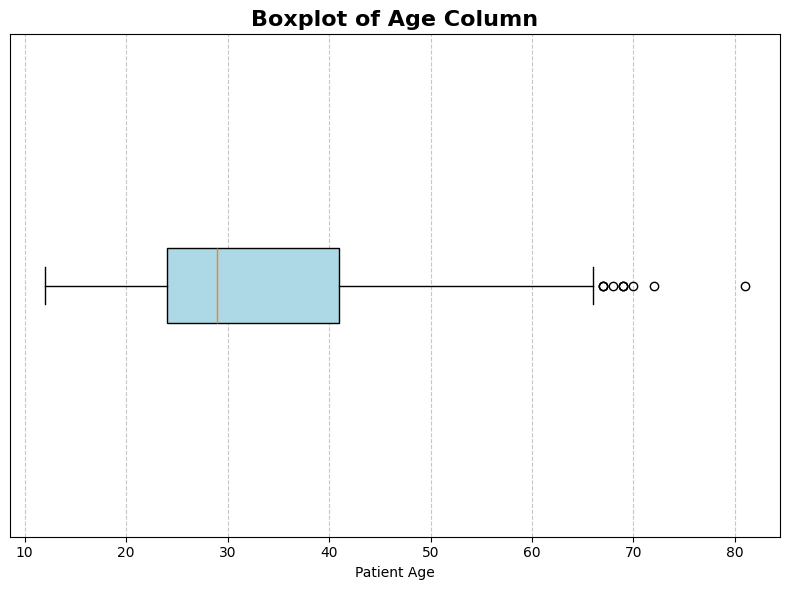

In [103]:
# Show a boxplot of the age column
fig_1, ax_1 = plt.subplots(figsize=(8,6))

boxplot = ax_1.boxplot(df['Age'], vert=False, patch_artist=True)
colors = ['lightblue']
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[0])
ax_1.set_xlabel('Patient Age')
ax_1.set_title('Boxplot of Age Column', fontweight='bold', fontsize=16)
ax_1.set_yticks([])
ax_1.grid(axis='x', linestyle='--', alpha=0.7)
fig_1.tight_layout()
plt.show()


In [104]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
783,8,107,80.0,0,0,24.6,0.856,34,0
784,13,158,114.0,0,0,42.3,0.257,44,1
785,2,121,70.0,32,95,39.1,0.886,23,0
786,7,129,68.0,49,125,38.5,0.439,43,1


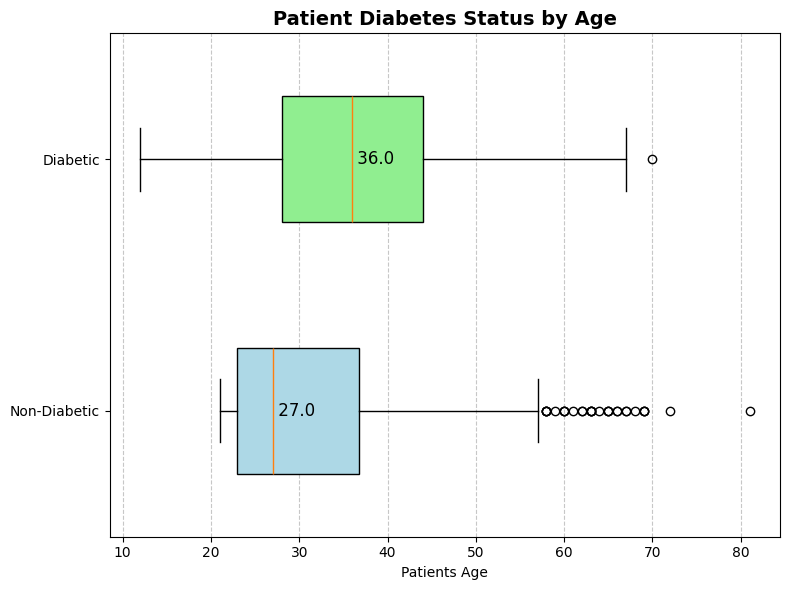

In [105]:
fig_2, ax_2 = plt.subplots(figsize=(8, 6))

non_diabetic = df[df['Outcome'] == 0]['Age']
diabetic = df[df['Outcome'] == 1]['Age']
boxplot_2 = ax_2.boxplot(non_diabetic, positions=[0], vert=False, patch_artist=True, widths=0.5)
boxplot_3 = ax_2.boxplot(diabetic, positions=[1], vert=False, patch_artist=True, widths=0.5)
colors_1 = ['lightblue']
colors_2 = ['lightgreen']
for patch in boxplot_2['boxes']:
    patch.set_facecolor(colors_1[0])
for patch in boxplot_3['boxes']:
    patch.set_facecolor(colors_2[0])
ax_2.set_yticks([1, 0])
ax_2.set_yticklabels(['Diabetic', 'Non-Diabetic'])
ax_2.set_xlabel('Patients Age')
ax_2.set_title('Patient Diabetes Status by Age', fontweight='bold', fontsize=14)
ax_2.text(non_diabetic.median(), 0, f' {non_diabetic.median()}', verticalalignment='center', fontsize=12, color='black')
ax_2.text(diabetic.median(), 1, f' {diabetic.median()}', verticalalignment='center', fontsize=12, color='black')
ax_2.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Analyse the relationship between the patient’s age and being diabetic in your report.
With a low amount of outliers and a median age of 36, it appears that most patients likely became diabetic in their mid 30s, while non-diabetics have either not reached an age where they developed diabetes (below 30), or are already past a point in their life where they could develop diabetes (likely due to life-long healthy eating habits).

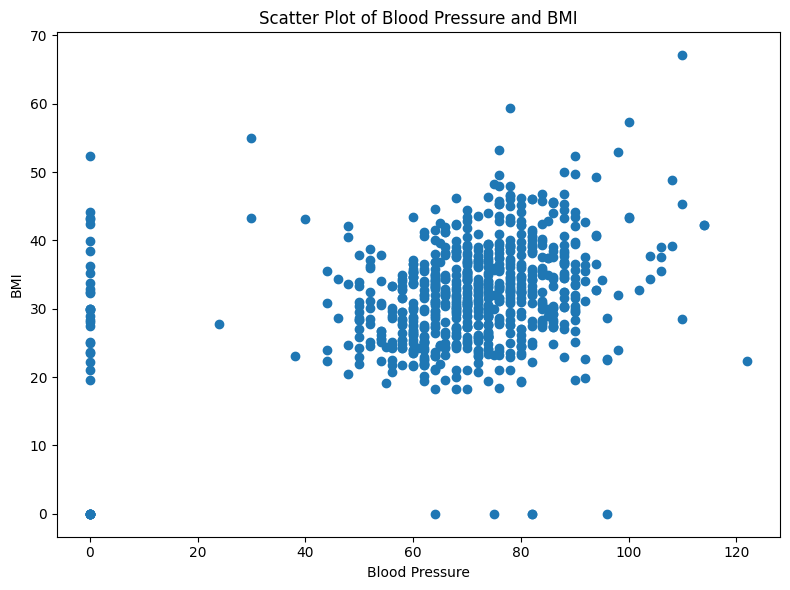

In [106]:
#Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on the y-axis.
fig_3, ax_3 = plt.subplots(figsize=(8,6))
ax_3 = plt.scatter(df['BloodPressure'], df['BMI'])
plt.title('Scatter Plot of Blood Pressure and BMI')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
fig_3.tight_layout()
plt.show()

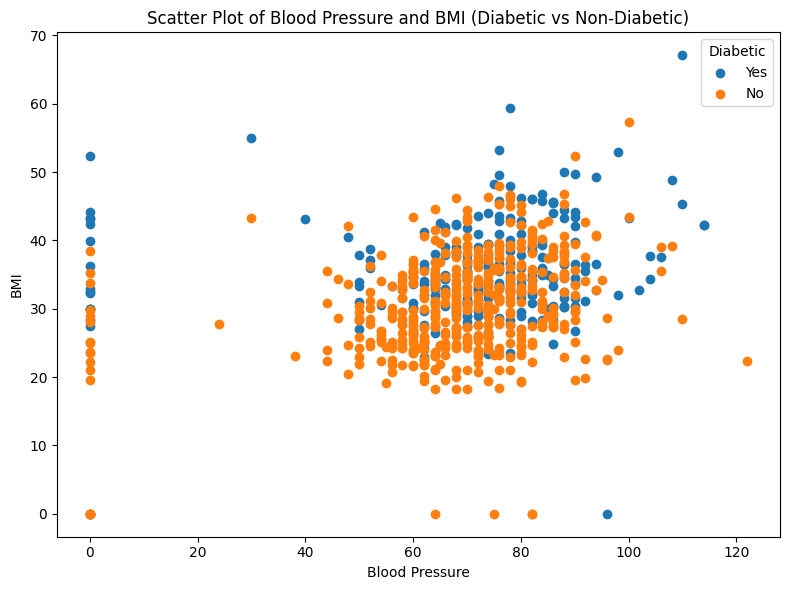

In [107]:
#Show a scatter plot with the patient’s Blood pressure on the x-axis and the patient’s BMI on the y-axis, highlighting diabetic patients with different colours. The colouring label should be ‘diabetic’: yes and no.
non_diabetic = df[df['Outcome'] == 0]
diabetic = df[df['Outcome'] == 1]

fig_4, ax_4 = plt.subplots(figsize=(8,6))

plt.scatter(diabetic['BloodPressure'], diabetic['BMI'], label='Yes')
plt.scatter(non_diabetic['BloodPressure'], non_diabetic['BMI'], label='No')
plt.title('Scatter Plot of Blood Pressure and BMI (Diabetic vs Non-Diabetic)')
plt.xlabel('Blood Pressure')
plt.ylabel('BMI')
#plt.legend()
ax_4.legend(title="Diabetic")
fig_4.tight_layout()
plt.show()

In [108]:
#Based on the scatterplot of question 5, analyse the relationship between BMI/Blood pressure and diabetes.

# Based on the above scatterplot, we can determine that there is surprisngly little correlation with a high BMI/Blood Pressure and being diabetic. 
# However, there are still more diabetic patients with higher BMI/Blood Pressure levels, so there is still a correlation. 

### 3: Data Filtering

In [109]:
#Select all patients with Insulin more than 400. How many patients are diabetic/no-diabetic among those selected?
df_2 = df[df['Insulin'] > 400]
df_2_diabetic = df_2[df_2['Outcome'] == 1]
num_diabetic = len(df_2_diabetic)
df_2_nondiabetic = df_2[df_2['Outcome'] == 0]
num_nondiabetic = len(df_2_nondiabetic)
print("There are %d diabetic patients with insulin over 400 and %d non-diabetic patients with insulin levels over 400 in this dataset." % (num_diabetic, num_nondiabetic))

There are 12 diabetic patients with insulin over 400 and 8 non-diabetic patients with insulin levels over 400 in this dataset.


In [110]:
#Select all patients with Insulin greater than 400 and Glucose greater than 175. How many patients are diabetic/no-diabetic among those selected?
df_3 = df_2[df_2['Glucose'] > 175]
df_3_diabetic = df_3[df_3['Outcome'] == 1]
num_diabetic_2 = len(df_3_diabetic)
df_3_nondiabetic = df_3[df_3['Outcome'] == 0]
num_nondiabetic_2 = len(df_3_nondiabetic)
print("There are %d diabetic patients with insulin over 400 and Glucose over 175 and %d non-diabetic patients with insulin levels over 400 and glucose over 175 in this dataset" % (num_diabetic_2, num_nondiabetic_2))

There are 5 diabetic patients with insulin over 400 and Glucose over 175 and 1 non-diabetic patients with insulin levels over 400 and glucose over 175 in this dataset


In [111]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
783,8,107,80.0,0,0,24.6,0.856,34,0
784,13,158,114.0,0,0,42.3,0.257,44,1
785,2,121,70.0,32,95,39.1,0.886,23,0
786,7,129,68.0,49,125,38.5,0.439,43,1


In [112]:
#What is the average Glucose level of a patient with more than 5 pregnancies and older than 45?
df_4 = df[df['Pregnancies'] > 5]
df_4 = df_4[df_4['Age'] > 45]
df_4_avg_glu = df_4['Glucose'].mean()
print("The average glucose level for patients over 45 with more than 5 pregnancies is: %d." % (df_4_avg_glu))

The average glucose level for patients over 45 with more than 5 pregnancies is: 135.


In [113]:
#Count the distinct values in the ‘pregnancies’ column.
distinct_preg = len(df['Pregnancies'].unique())
print("There are %d distinct values in the pregnancies column." % (distinct_preg))

There are 17 distinct values in the pregnancies column.


In [114]:
#List the distinct values of the ‘pregnancies’ column along with the percentage of diabetic/no-diabetic of each value.
grouped_df = df.groupby('Pregnancies')['Outcome']
value_counts = grouped_df.value_counts(normalize=True)
percentages = value_counts.unstack().fillna(0)
percentages

Outcome,0,1
Pregnancies,,
0,0.660714,0.339286
1,0.773050,0.226950
2,0.824074,0.175926
3,0.644737,0.355263
4,0.666667,0.333333
5,0.637931,0.362069
6,0.680000,0.320000
7,0.434783,0.565217
8,0.450000,0.550000


***

## Question 2: Data Cleaning

***

### 1: Duplicated Removal 

In [115]:
#Identify any duplicated records by printing “True” if the row is duplicated and “False” otherwise.
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
783     True
784     True
785     True
786     True
787     True
Length: 788, dtype: bool


In [116]:
#For all duplicated records, keep one record and remove its duplicates.
df = df.drop_duplicates(keep=False)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,15,1
...,...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33,0
763,10,101,76.0,48,180,32.9,0.171,63,0
765,5,121,72.0,23,112,26.2,0.245,30,0
766,1,126,60.0,0,0,30.1,0.349,47,1


In [117]:
#What is the dimension of the data frame after removing the duplicates?
print("Number of Rows: %d." % (df.shape[0]))
print("Number of Columns: %d" % (df.shape[1]))

Number of Rows: 748.
Number of Columns: 9


In [118]:
#How many duplicated rows were there (before removing the duplicates)?
num_duplicates = duplicates.sum()
print(num_duplicates)

20


## 2: Missing Values

In [119]:
#How many missing values are in the “blood pressure” column?
print("There are %d missing values in the blood pressure column" % (df['BloodPressure'].isnull().sum(axis = 0)))

There are 23 missing values in the blood pressure column


In [120]:
#Remove the missing records in the “blood pressure” column.
df = df.dropna(subset=['BloodPressure'])

In [121]:
print("Number of Rows: %d." % (df.shape[0]))
print("Number of Columns: %d." % (df.shape[1]))

Number of Rows: 725.
Number of Columns: 9.


In [122]:
#Copy the following columns into a separate data frame: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
df_2 = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].copy()

In [123]:
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72.0,35,0,33.6,0.627,50
1,1,85,66.0,29,0,26.6,0.351,31
2,8,183,64.0,0,0,23.3,0.672,32
3,1,89,66.0,23,94,28.1,0.167,21
4,0,137,40.0,35,168,43.1,2.288,15
...,...,...,...,...,...,...,...,...
762,9,89,62.0,0,0,22.5,0.142,33
763,10,101,76.0,48,180,32.9,0.171,63
765,5,121,72.0,23,112,26.2,0.245,30
766,1,126,60.0,0,0,30.1,0.349,47


In [124]:
#On the newly copied data from (3). Use sklearn’s train_test_split function to split the data into 90% training and 10% test.pip install -U scikit-learn
X_train, X_test = train_test_split(df_2, test_size=0.1)

In [125]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
297,0,126,84.0,29,215,30.7,0.520,24
229,0,117,80.0,31,53,45.2,0.089,24
7,10,115,0.0,0,0,35.3,0.134,29
530,2,122,60.0,18,106,29.8,0.717,22
407,0,101,62.0,0,0,21.9,0.336,25
...,...,...,...,...,...,...,...,...
666,4,145,82.0,18,0,32.5,0.235,70
11,10,168,74.0,0,0,38.0,0.537,34
192,7,159,66.0,0,0,30.4,0.383,36
16,0,118,84.0,47,230,45.8,0.551,12


In [126]:
#On the test set, set the Glucose to null for those records. And keep a separate copy for evaluation in the following questions.
X_test_2 = X_test.copy()
X_test_2['Glucose'] = np.NaN
X_test_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
297,0,NaN,84.0,29,215,30.7,0.520,24
229,0,NaN,80.0,31,53,45.2,0.089,24
7,10,NaN,0.0,0,0,35.3,0.134,29
530,2,NaN,60.0,18,106,29.8,0.717,22
407,0,NaN,62.0,0,0,21.9,0.336,25
...,...,...,...,...,...,...,...,...
666,4,NaN,82.0,18,0,32.5,0.235,70
11,10,NaN,74.0,0,0,38.0,0.537,34
192,7,NaN,66.0,0,0,30.4,0.383,36
16,0,NaN,84.0,47,230,45.8,0.551,12


In [127]:
#Fill in the missing values of the test set based on the mean of the Glucose of the training set (90%). Calculate the RMSEs for the imputed values of the test set.
X_train_glucose_mean = X_train['Glucose'].mean()
print(X_train_glucose_mean)

121.5521472392638


In [128]:
X_test_2['Glucose'] = X_train_glucose_mean
X_test_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
297,0,121.552147,84.0,29,215,30.7,0.520,24
229,0,121.552147,80.0,31,53,45.2,0.089,24
7,10,121.552147,0.0,0,0,35.3,0.134,29
530,2,121.552147,60.0,18,106,29.8,0.717,22
407,0,121.552147,62.0,0,0,21.9,0.336,25
...,...,...,...,...,...,...,...,...
666,4,121.552147,82.0,18,0,32.5,0.235,70
11,10,121.552147,74.0,0,0,38.0,0.537,34
192,7,121.552147,66.0,0,0,30.4,0.383,36
16,0,121.552147,84.0,47,230,45.8,0.551,12


In [129]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
297,0,126,84.0,29,215,30.7,0.520,24
229,0,117,80.0,31,53,45.2,0.089,24
7,10,115,0.0,0,0,35.3,0.134,29
530,2,122,60.0,18,106,29.8,0.717,22
407,0,101,62.0,0,0,21.9,0.336,25
...,...,...,...,...,...,...,...,...
666,4,145,82.0,18,0,32.5,0.235,70
11,10,168,74.0,0,0,38.0,0.537,34
192,7,159,66.0,0,0,30.4,0.383,36
16,0,118,84.0,47,230,45.8,0.551,12


In [130]:
#Calculate the RMSEs for the imputed values of the test set. 
m_s_e = mean_squared_error(X_test['Glucose'].values, X_test_2['Glucose'].values)
print(m_s_e)
r_m_s_e = np.sqrt(m_s_e)
print("The RMSEs for the imputed values of the test set is: %d." % (r_m_s_e))

727.329490491803
The RMSEs for the imputed values of the test set is: 26.


In [131]:
#Fill in the missing values of the test set based on the median of the Glucose of the training set (90%). Calculate the RMSEs for the imputed values of the test set.
X_train_glucose_median = X_train['Glucose'].median()
print(X_train_glucose_median)

117.0


In [132]:
X_test_2['Glucose'] = X_train_glucose_median
X_test_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
297,0,117.0,84.0,29,215,30.7,0.520,24
229,0,117.0,80.0,31,53,45.2,0.089,24
7,10,117.0,0.0,0,0,35.3,0.134,29
530,2,117.0,60.0,18,106,29.8,0.717,22
407,0,117.0,62.0,0,0,21.9,0.336,25
...,...,...,...,...,...,...,...,...
666,4,117.0,82.0,18,0,32.5,0.235,70
11,10,117.0,74.0,0,0,38.0,0.537,34
192,7,117.0,66.0,0,0,30.4,0.383,36
16,0,117.0,84.0,47,230,45.8,0.551,12


In [133]:
#Calculate the RMSEs for the imputed values of the test set. 
m_s_e = mean_squared_error(X_test['Glucose'].values, X_test_2['Glucose'].values)
print(m_s_e)
r_m_s_e = np.sqrt(m_s_e)
print("The RMSEs for the imputed values of the test set is: %d." % (r_m_s_e))

696.6301369863014
The RMSEs for the imputed values of the test set is: 26.


In [134]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
297,0,126,84.0,29,215,30.7,0.520,24
229,0,117,80.0,31,53,45.2,0.089,24
7,10,115,0.0,0,0,35.3,0.134,29
530,2,122,60.0,18,106,29.8,0.717,22
407,0,101,62.0,0,0,21.9,0.336,25
...,...,...,...,...,...,...,...,...
666,4,145,82.0,18,0,32.5,0.235,70
11,10,168,74.0,0,0,38.0,0.537,34
192,7,159,66.0,0,0,30.4,0.383,36
16,0,118,84.0,47,230,45.8,0.551,12


In [135]:
#Unfortunately, I left the SimpleImputer, KNNImputer part for last as I found it most challenging and ran out of time before submission to complete. 
# Questions 8-10 are unanswered :(, I apologize. 

In [136]:
#Use scikit-learn SimpleImputer with the 'most_frequent' strategy, and calculate RMSE.
X_test_3 
X_test['Glucose'] = np.NaN
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(X_test)
X_test_3 = imputer.transform(X_test_3)
df_impute = pd.DataFrame(X_test_3, columns=X_test.columns)
df_impute

NameError: name 'X_test_3' is not defined

In [137]:
#Use scikit-learn KNNImputer (for neighbours = 3), and calculate RMSE.

In [138]:
#Which Imputer is better?

***